1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


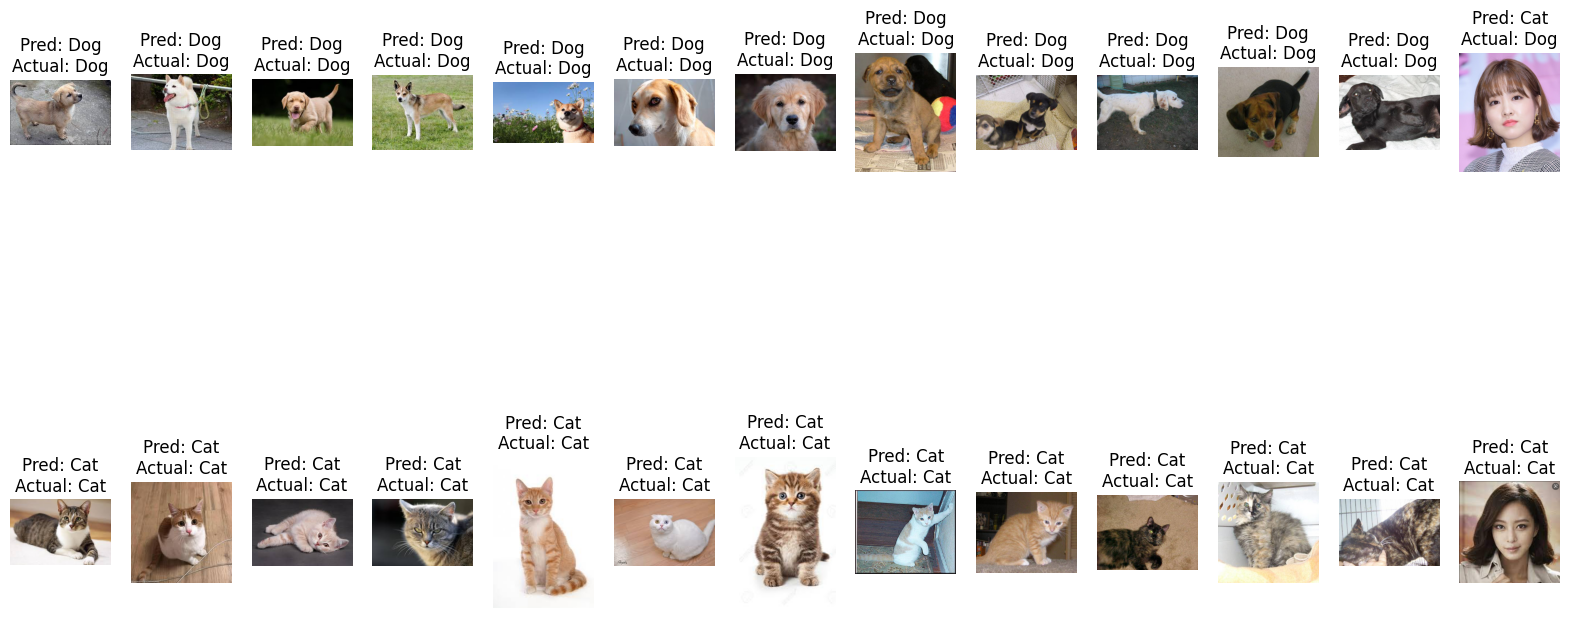

In [3]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# rootPath = 'dogs-vs-cats/'
best_model_path = "cat_dog_classifier.keras" # 최적 모델 파일 경로를 입력
model = load_model(best_model_path)
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 # 모델이 학습된 대로 정규화
    return img_array

def predict_and_plot_images(image_paths, labels):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(image_paths):
        img_array = load_and_preprocess_image(img_path)
        prediction = model.predict(img_array)[0][0]
        label = 'Dog' if prediction > 0.5 else 'Cat'

        plt.subplot(2, 13, i + 1)
        plt.imshow(image.load_img(img_path))
        plt. title(f"Pred: {label}\nActual: {labels[i]}")
        plt.axis('off')
    plt.show()
#'Check' 폴더에 있는 이미지 경로
dog_image_paths = [f'check/dog/d{i}.jpg' for i in range(1, 14)]
cat_image_paths = [f'check/cat/c{i}.jpg' for i in range(1, 14)]
# 실제 레이블
dog_labels = ['Dog'] * 13
cat_labels = ['Cat'] * 13
# 모든 이미지 경로와 레이블 합치기
all_image_paths = dog_image_paths + cat_image_paths
all_labels = dog_labels + cat_labels
#predict하고 결과 표시하기
predict_and_plot_images(all_image_paths, all_labels)